# Mini Projet MDI220

*By Daniel Jorge Deutsch*

In [2]:
import ssl
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

# Data Source Constants
LINK_NUCLEAR_POWER_ACCIDENTS = "https://innovwiki.ethz.ch/v1/images/NuclearPowerAccidents2016.csv"

# Exercise 1.1

In [3]:
# Avoids the "certificate verify failed" error when reading the csv
ssl._create_default_https_context = ssl._create_unverified_context

# Loads the dataframe
df = pd.read_csv(
    LINK_NUCLEAR_POWER_ACCIDENTS,                                                # Link in which the data is 
    header = 0,                                                                  # Ignores the first line (column names)
    names = ["date", "loc", "cost", "ines", "syth_mag", "reg", "desc", "fat"],   # Sets the name of each column
    keep_default_na = False,                                                     # Prevents pandas from considering the region NA as NaN
    na_values = [""],                                                            # Define only missing data as NaN
    parse_dates = ["date"]                                                       # Parse the date column into datetime
)

# Obtains the date of the Three Mile Island accident
tmi_date = df[df["desc"].str.contains("Three Mile Island")].iloc[0]["date"]

# Selects only the accidents that occured before the Three Mile Island accident
df = df[df["date"] < tmi_date]

# Drop all lines that have NaN in the cost column
df = df[df["cost"].notna()]

# Obtains the array cost
costs = df["cost"].to_numpy()

# Prints the size of the costs array
print(f"The costs array has {len(costs)} elements.")

The costs array has 55 elements.


# Exercise 1.2.a

Soit $ X \sim \mathcal{N}\left(\mu, \sigma \right) $ et $ Z \sim \mathcal{N}\left(0, 1 \right) $ deux variables aléatoires telles que $ X = \mu + \sigma Z $. Considérez la fonction de répartition $ \mathcal{F}\left(p; \mu, \sigma^2 \right) $ associée à $X$ telle que $ \mathcal{F}^{-1}\left(p; \mu, \sigma^2 \right) $ soit son inverse. Alors, on a par définition:

<br>

\begin{align}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \mu, \sigma^2\right)\right) \quad = \quad p \qquad \forall p \in ]0,1[
\end{align}

<br>

Si on calcule $ \mathcal{F}\left(\mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1\right)\right) $, on a:

<br>

\begin{align}
    \mathcal{F}\left(\mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1 \right)\right) \quad & = \quad P\left(X < \mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1 \right)\right) \\
    & = \quad P\left(\frac{X-\mu}{\sigma} < \mathcal{F}^{-1}\left(p; 0, 1\right)\right) \\
    & = \quad P\left(Z < \mathcal{F}^{-1}\left(p; 0, 1\right)\right) \\
    & = \quad p
\end{align}

<br>

Alors, on a:

<br>

\begin{cases}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \mu, \sigma^2 \right)\right) \quad & = \quad p \\
    \mathcal{F}\left(\mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1 \right)\right) & = \quad p
\end{cases}

<br>

C'est a dire que:

<br>

\begin{align}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \mu, \sigma^2 \right)\right) \quad = \quad \mathcal{F}\left(\mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1 \right)\right)
\end{align}

<br>

Une fois que $\mathcal{F}$ est strictement croissante, les arguments des fonctions d'égalité ci-dessus sont les mêmes, donc: 

<br>

\begin{align}
    \mathcal{F}^{-1}\left(p; \mu, \sigma^2 \right) \quad & = \quad \mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1\right) \\
    & = \quad \mu + \sqrt{\sigma^2} \mathcal{F}^{-1}\left(p; 0, 1\right)
\end{align}

# Exercise 1.2.b

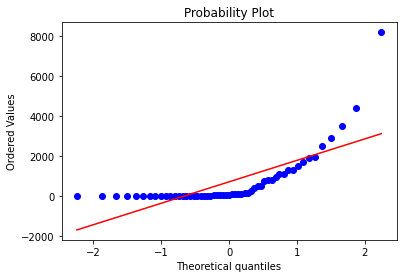

In [4]:
# Plots the QQ-plot using the normal law
osm, osr = sp.stats.probplot(costs, dist=sp.stats.distributions.norm, plot=plt)

# Exercise 1.3.a 

Soit $ X \sim \mathcal{E}\left(\lambda \right) $ et $ Z \sim \mathcal{E}\left(1 \right) $ deux variables aléatoires telles que $ Z = \lambda X $. Considérez la fonction de répartition $ \mathcal{F}\left(p; \lambda \right) $ associée à $X$ telle que $ \mathcal{F}^{-1}\left(p; \lambda \right) $ soit son inverse. Alors, on a par définition:

<br>

\begin{align}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \lambda \right)\right) \quad = \quad p \qquad \forall p \in ]0,1[
\end{align}

<br>

Si on calcule $ \mathcal{F}\left(\frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right) $, on a:

<br>

\begin{align}
    \mathcal{F}\left(\frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right) \quad & = \quad P\left(X < \frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right) \\
    & = \quad P\left(\lambda X < \mathcal{F}^{-1}\left(p; 1 \right)\right) \\
    & = \quad P\left(Z < \mathcal{F}^{-1}\left(p; 1 \right)\right) \\
    & = \quad p
\end{align}

<br>

Alors, on a:

<br>

\begin{cases}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \lambda \right)\right) \quad & = \quad p \\
    \mathcal{F}\left(\frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right) & = \quad p
\end{cases}

<br>

C'est a dire que:

<br>

\begin{align}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \lambda \right)\right) \quad = \quad \mathcal{F}\left(\frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right)
\end{align}

<br>

Une fois que $\mathcal{F}$ est strictement croissante, les arguments des fonctions d'égalité ci-dessus sont les mêmes, donc: 

<br>

\begin{align}
    \mathcal{F}^{-1}\left(p; \lambda \right) \quad = \quad \frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)
\end{align}

# Exercise 1.3.b

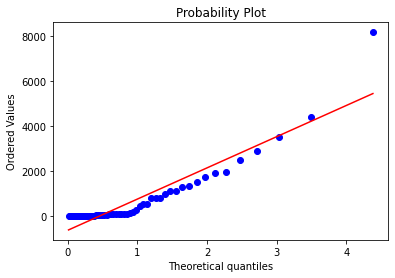

In [5]:
# Plots the QQ-plot using the exponential law
osm, osr = sp.stats.probplot(costs, dist=sp.stats.distributions.expon, plot=plt)

# Exercise 1.4

En regardant les graphiques des quantiles obtenus dans les exercises 1.2.b et 1.3.b, nous pouvons nous convaincre que l’approche exponentielle est plus acceptable comme loi de probabilité que la loi normale car ses couts sont plus proches de la droite sur le Q-Q plot.

# Exercise 2.1

http://www.portalaction.com.br/inferencia/341-metodos-numericos-dos-estimadores-de-maxima-verossimilhanca

http://ressources.unisciel.fr/ramses/519-21_probabilites/co/fa901_5_5.html

In [13]:
λn_hat = len(costs)/np.sum(costs)
print(f"λn_hat: {λn_hat}")

λn_hat: 0.0013767725947156965


# Exercise 2.2

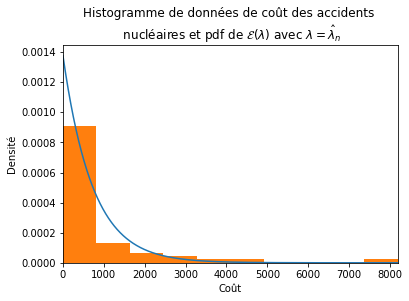

In [7]:
# Obtains the pdf
x = np.linspace(0, np.max(costs), int(np.max(costs)))   # Costs of the accidents
f = λn_hat*np.e**(-λn_hat*x)                            # Probability Density Function

# Plots the desired outcome
plt.title("Histogramme de données de coût des accidents \n nucléaires et pdf de $\mathcal{E}(\lambda)$ avec $\lambda = \hat{\lambda}_n$")
plt.xlabel("Coût")
plt.ylabel("Densité")
plt.xlim(x[0], x[-1])
plt.plot(x, f)
n, bins, patches = plt.hist(costs, density=True)

# Exercise 2.3

<br>

D'abord on calcule l'esperance de $T_1\left(X\right)$:

<br>

\begin{align}
    E\left[T_1\left(X\right)\right] \quad & = \quad E\left[\frac{1}{n}\sum_{i=1}^{n}X_i\right] \\
    & = \quad \frac{1}{n}\sum_{i=1}^{n}E\left[X_i\right] \\
    & = \quad \frac{1}{n}\frac{n}{\lambda} \\
    & = \quad \frac{1}{\lambda} \\
    & = \quad g_1\left(\lambda\right) \quad \therefore \ T_1\left(X\right) \ \text{est un estimateur non biaisé}
\end{align}

<br>

Maintenant on calcule la variance de $T_1\left(X\right)$:

<br>

\begin{align}
    Var\left[T_1\left(X\right)\right] \quad & = \quad Var\left[\frac{1}{n}\sum_{i=1}^{n}X_i\right] \\
    & = \quad \frac{1}{n^2}\sum_{i=1}^{n}Var\left[X_i\right] \\
    & = \quad \frac{1}{n^2}\frac{n}{\lambda^2} \\
    & = \quad \frac{1}{n \lambda^2}  \quad \therefore \ \lim\limits_{n \rightarrow \infty} Var\left[T_1\left(X\right)\right] \ = \ 0
\end{align}

<br>

# FALTA ALGUMA AQUI

Donc $T_1\left(X\right)$ est un estimateur efficace pour $g_1\left(\lambda\right)$.

# Exercise 2.4

In [14]:
T1 = np.sum(costs)/len(costs)
g1 = T1
print(f"g1: {g1}")

g1: 726.3363636363637


# Exercise 2.5

<br>

On commence par calculer les bials $b\left(\lambda, T_1\left(X\right)\right)$ et $b\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)$ de $T_1\left(X\right)$ et $\tilde{T}_{1, \eta}\left(X\right)$, respectivement:

<br>

\begin{align}
        b\left(\lambda, T_1\left(X\right)\right) \quad & = \quad E\left[T_1\left(X\right) - g_1\left(\lambda\right)\right]
        &&&
        b\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) \quad & = \quad E\left[\tilde{T}_{1, \eta}\left(X\right) - g_1\left(\lambda\right)\right]
    \\
        & = \quad E\left[T_1\left(X\right)\right] - g_1\left(\lambda\right) 
        &&&
        & = \quad E\left[\tilde{T}_{1, \eta}\left(X\right)\right] - g_1\left(\lambda\right)
    \\
        & = \quad g_1\left(\lambda\right) - g_1\left(\lambda\right) 
        &&&
        & = \quad E\left[\eta \ T_1\left(X\right)\right] - g_1\left(\lambda\right)
    \\
        & = \quad 0 \quad \text{comme prévu, une fois que } T_1\left(X\right) \text{est non biaisé}
        &&&
        & = \quad \eta \ E\left[T_1\left(X\right)\right] - g_1\left(\lambda\right)
    \\
        & \quad
        &&&
        & = \quad \eta \ g_1\left(\lambda\right) - g_1\left(\lambda\right)
    \\
        & \quad
        &&&
        & = \quad g_1\left(\lambda\right) \ \left(1 - \eta\right)
    \\
        & \quad
        &&&
        & = \quad \frac{1}{\lambda} \ \left(1 - \eta\right)
\end{align}

<br>

Maintenant, on peut calculer les risques quadratiques $R\left(\lambda, T_1\left(X\right)\right)$ et $R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)$:

<br>

\begin{align}
        R\left(\lambda, T_1\left(X\right)\right) \quad & = \quad E\left[\left(T_1\left(X\right)-g_1\left(\lambda\right)\right)^2\right]
        &&&
        R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) \quad & = \quad E\left[\left(\tilde{T}_{1, \eta}\left(X\right)-g_1\left(\lambda\right)\right)^2\right]
    \\
        & = \quad \underbrace{b\left(\lambda, T_1\left(X\right)\right)^2}_{\text{= 0}} + Var\left(T_1\left(X\right)\right)
        &&&
        & = \quad b\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)^2 + Var\left(\tilde{T}_{1, \eta}\left(X\right)\right)
    \\
        & = \quad Var\left(T_1\left(X\right)\right)
        &&&
        & = \quad \left(\frac{1}{\lambda} \ \left(1 - \eta\right)\right)^2 + Var\left(\eta \ T_1\left(X\right)\right)
    \\
        & = \quad \frac{1}{n\lambda^2}
        &&&
        & = \quad \frac{1}{\lambda^2} \ \left(1 - \eta\right)^2 + \eta^2 \ Var\left(T_1\left(X\right)\right)
    \\
        & \quad
        &&&
        & = \quad \frac{1}{\lambda^2} \ \left(1 - \eta\right)^2 + \eta^2 \ \frac{1}{n \ \lambda^2}
    \\
        & \quad
        &&&
        & = \quad \frac{1}{\lambda^2} \left(\left(\eta - 1\right)^2 + \frac{\eta^2}{n}\right)
\end{align}

<br>

Alors, on a:

<br>

\begin{align}
    R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) \quad & < \quad R\left(\lambda, T_1\left(X\right)\right) \\
    R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) - R\left(\lambda, T_1\left(X\right)\right) \quad & < \quad 0 \\
    \frac{1}{\lambda^2} \left(\left(\eta - 1\right)^2 + \frac{\eta^2}{n}\right) - \frac{1}{n\lambda^2} \quad & < \quad 0 \\
    \frac{\left(\eta - 1\right)^2}{\lambda^2} + \frac{\eta^2 - 1}{n\lambda^2} \quad & < \quad 0 \\
    \left(\eta - 1\right)^2 + \frac{\eta^2 - 1}{n} \quad & < \quad 0 & \left(\forall\lambda > 0 \right) \\
    \left(\eta - 1\right) \left(\eta - 1 + \frac{\eta + 1}{n}\right) \quad & < \quad 0 \\
    \left(\eta - 1\right) \left[\frac{\left(n + 1\right) \eta + \left(1 - n\right)}{n}\right] \quad & < \quad 0 \\
    \left(\eta - 1\right) \left[\left(n + 1\right) \eta + \left(1 - n\right)\right] \quad & < \quad 0 & \left(n > 0\right) \\
    \left(\eta - 1\right) \left[\eta + \frac{1 - n}{n + 1}\right] \quad & < \quad 0 \\
    \left(\eta - 1\right) \left[\eta - \frac{n - 1}{n + 1}\right] \quad & < \quad 0
\end{align}

<br>

Ce qui ne sera vrai que dans les situations suivantes:

<br>

\begin{align}
    \left(i\right)
    \begin{cases}
        \eta - 1 \quad & < \quad 0 \\
        \eta - \frac{n-1}{n+1} \quad & > \quad 0
    \end{cases}
    &&&&
    et
    &&&&
    \left(ii\right)
    \begin{cases}
        \eta - 1 \quad & > \quad 0 \\
        \eta - \frac{n-1}{n+1} \quad & < \quad 0
    \end{cases}
\end{align}

<br>

On a donc que seule la valeur $\eta \in \left]\frac{n-1}{n+1}, \ 1\right[$ satisfait le système $\left(i\right)$ et que $\nexists \ \eta \in \mathbb{R}$ qui satisfait le système $\left(ii\right)$. donc, comme nous voulons joindre les intervalles obtenus pour $\eta$ dans les systèmes $\left(i\right)$ et $\left(ii\right)$, l'intervalle de valeurs de $\eta$ dans lequel $R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) < R\left(\lambda, T_1\left(X\right)\right)$ est:

<br>

\begin{align}
    \eta \in \left]\frac{n-1}{n+1}, \ 1\right[
\end{align}

<br>

**Il est à noter que ce résultat ne contredit pas la question précédente car $\tilde{T}_{1, \eta}\left(X\right)$ est biaisé.**

# Exercise 2.6

<br>

Pour estimer la médiane de cette variable aléatoire, on  construire un estimateur, par la méthode des moments, par exemple. Cependant, la médiane g2(λ) est définie par:

Seja $g_2\left(\lambda\right)$ um estimador da mediana $M$ da variavel aleatória $X$, nós temos por definição:

\begin{align}
    \int_{0}^{g_2\left(\lambda\right)}f_X\left(x, \lambda\right) dx \quad & = \quad \frac{1}{2} \\
    
\end{align}


In [11]:
# Obtains the empirical median
emp_median = np.median(costs)

# Obtains the estimated median
est_median = "a"

print(f"Empirical median: {emp_median}")
print(f"Estimated median: {est_median}")

Empirical median: 89.9
Estimated median: a


# Exercise 2.7

# Exercise 3.1

# Exercise 3.2

# Exercise 3.3

# Exercise 3.4

# Exercise 3.5

# Exercise 3.6